# Faris Abufarha
# 1200546

In [1]:
! pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!python3 -m pip show scikit-learn # to see which version and wherescikit-learn is installed
!python3 -m pip freeze # to see all packages installed in the active virtualenv
!python3 -c "import sklearn; sklearn.show_versions()"

Name: scikit-learn
Version: 1.5.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /home/faris/.local/lib/python3.10/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: feature-engine, imbalanced-learn, lazypredict
aiohttp==3.8.1
aiosignal==1.2.0
alabaster==0.7.12
anyio==4.0.0
appdirs==1.4.4
apturl==0.5.2
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
astroid==2.9.3
asttokens==2.4.0
async-lru==2.0.4
async-timeout==4.0.1
atomicwrites==1.4.0
attrs==23.1.0
autopep8==1.6.0
Babel==2.12.1
backcall==0.2.0
bcrypt==3.2.0
beautifulsoup4==4.12.2
beniget==0.4.1
black==21.10b0
bleach==6.0.0
blinker==1.4
Brlapi==0.8.3
Brotli==1.0.9
certifi==2020.6.20
cffi==1.15.1
chardet==4.0.0
charset-normalizer==3.2.0
chrome-gnome-shell==0.0.0
click==8.0.3
cloudpickle==2.0.0
colorama==0.4.4
comm==0.1.4
command-not-found==0.3
contourpy==1.1.1
cryptography==3.4.8
cupshelpers

# 1.1 Regression
Regression is a statistical technique that relates a continuous dependent variable to
one or more independent variables. In this part, we will fit different regression models
on a toy dataset.

## 1.1.1 Generating examples
We will start by generating a toy dataset. Generate 40 examples using the following
function
f (x) = sin(x) + ϵ,
where ϵ is sampled from a normal distribution with standard deviation 0.1, and
x ∈ [0, 1). Split the samples to into two equal sets: training set, and testing set.

In [4]:
import numpy as np
def true_fun(X):
    return np.sin(1.5 * np.pi * X)


In [5]:
np.random.seed(0)
n_samples = 40
X = np.random.rand(n_samples)

X_train = np.sort(X[:n_samples//2])
y_train = true_fun(X_train) + np.random.randn(n_samples//2) * 0.1

X_test = np.sort(X[n_samples//2:])
y_test = true_fun(X_test) + np.random.randn(n_samples//2) * 0.1

Plot both the training and testing examples in a scatter plot and show the true
function curve for the range [0, 1).

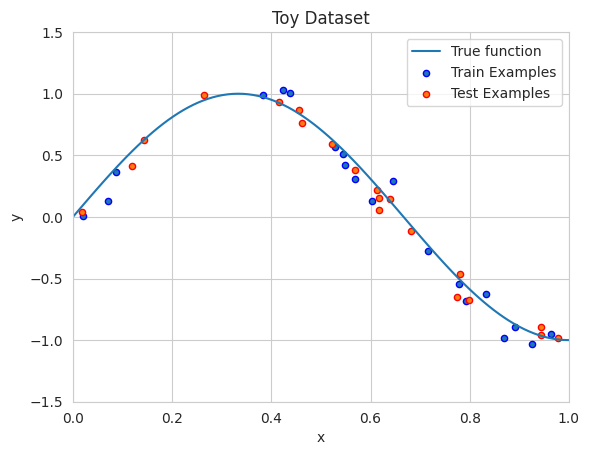

In [7]:
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 100)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Train Examples")
plt.scatter(X_test, y_test, edgecolor="r", s=20, label="Test Examples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Toy Dataset")
plt.show()

## 1.1.2 Linear regression
Let’s begin with a simple linear regression model. I.e., we will fit a line to the training
set of the form

h(x) = wo + w1x

where x is the input feature, w0 is the intercept of the fitted line, and w1 is its slope.
We will use the linear regression implementation from sklearn to get our model. Plot
the fitted line.

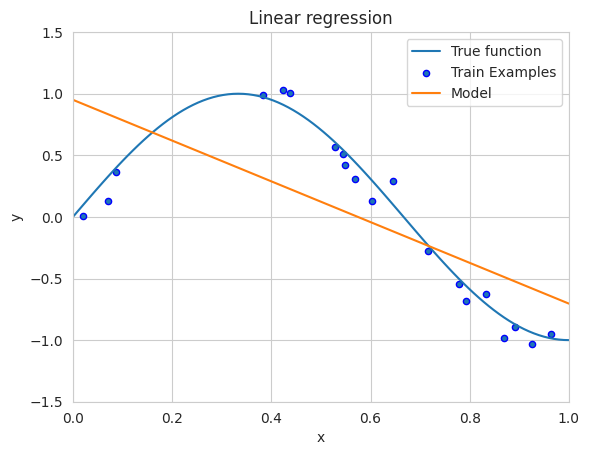

In [8]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train[:, np.newaxis], y_train)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Train Examples")
plt.plot(x, linear_regression.predict(x[:, np.newaxis]), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Linear regression")
plt.show()

Task 1: Compute the **mean squared error** of the learned linear model on the test set.

In [10]:
from sklearn.metrics import mean_squared_error

X_test = X_test[:, np.newaxis]  # Ensure X_test is reshaped correctly

y_pred = linear_regression.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error on the test set:", mse)



Mean Squared Error on the test set: 0.1736489094130998


## 1.1.3 Polynomial regression
The linear model we got in the previous part is too simple to explain the data. In
this part we will use more complex models. Let’s start with a quadratic function of
the form

h(x) = wo + w1 x + w2 x2 ,

To get the non-linear basis functions for the quadratic model, we will use Polyno-
mialFeatures from sklearn